# Bandes électroniques

In [131]:
#Téléchargement des données du matériau
from pymatgen.ext.matproj import MPRester
with MPRester ("Js0y7wlKAQ1kbIXr") as m:
    bandstructure = m.get_bandstructure_by_material_id("mp-11601")

**Structure des bandes électroniques de NaErO₂**

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

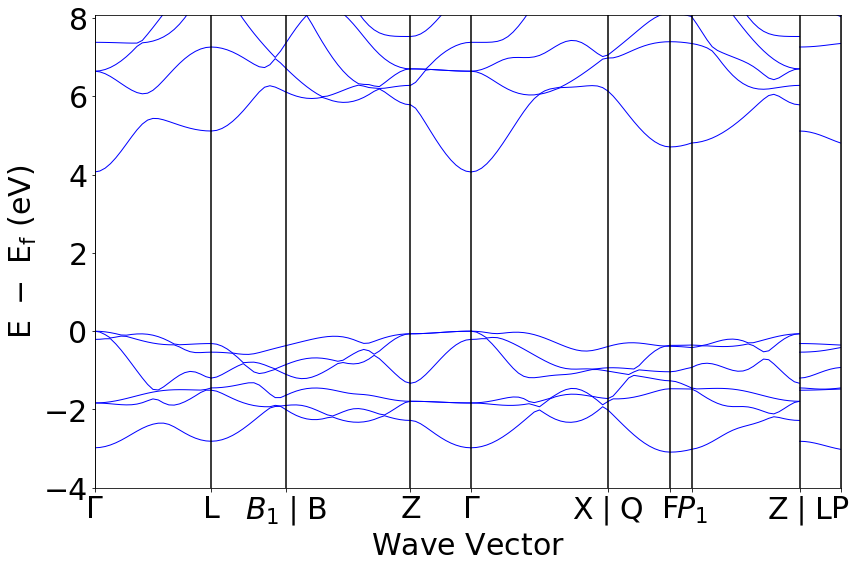

In [132]:
from pymatgen.electronic_structure.plotter import BSPlotter as bsp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown,display
def printst(string):
    display(Markdown(string))

#Création d'un objet BSPlotter pour pouvoir afficher le graphe
fig = bsp(bandstructure)

printst('**Structure des bandes électroniques de NaErO\u2082**')
fig.get_plot()

# 1) Bande interdite

La bande interdite est une bande ne comportant aucun niveau d'énergie pouvant être occupé par l'électron. Elle sépare la bande de valence et la bande de conduction pour les semi-conducteurs et les isolants. 

In [133]:
#Détermination de la bande interdite
gap = bandstructure.get_band_gap()
print("Information sur la bande interdite :", gap)

#Energie de fermi
ef = bandstructure.efermi
print("L'énergie de Fermi est de",ef, "eV")

Information sur la bande interdite : {'direct': True, 'energy': 4.0684000000000005, 'transition': '\\Gamma-\\Gamma'}
L'énergie de Fermi est de 1.18979979 eV


Dans ce cas-ci, la bande interdite est directe, cela signifie que les extremums des bandes de valence et de conduction correspondent au même quasi-moment, ils sont donc alignés. On peut donc dire que le franchissement de la bande interdite se fait sans émission de phonons. Tout ceci peut se vérifier par le fait que la transition se fait d'un k-point $\Gamma$ à un autre k-point $\Gamma$, les extrêmums sont donc tous les deux associés au même vecteur d'onde. 

La bande interdite a une énergie de 4.0684 eV, elle est située entre 1.18979979 eV et 5.25819979 eV. On peut en conclure que ce matériau est proche d'être un isolant car son énergie est proche de celle des isolants qui est généralment comprise entre 5 et 10 eV. 

# 2) Direction des maximums et minimums de dispersion pour la dernière bande de valence et la première bande de conduction

Tout d'abord, il est nécessaire de définir la dernière bande de valence et la première bande de conduction. Ensuite, il va falloir calculer les différentes pentes de chaque branche pour ces bandes. Enfin il faudra prendre les pentes avec les valeurs absolues les plus petites et les plus grandes pour obtenir respectivement les dispersions minimales et maximales de chaque bande. 

### A) Dernière bande de valence et première bande de conduction

In [134]:
#On parcourt les énergies des différentes bandes afin de trouver celle qui sera la première bande de conduction donc la  
#première bande qui aura des énergies supérieures à 2 eV et la dernière bande de valence sera celle qui précède la première de 
#conduction.
a = True
i = 0
indice_cond = -1
indice_val = -1
donnees = fig.bs_plot_data() #Données sur la structure de bande
en = donnees.get('energy')   #Energie des différentes bandes
while(a and i<bandstructure.nb_bands):
    if en[0].get('1')[i][0] > 2:
        a = False #on arrête la boucle
        indice_cond = i
        indice_val = i-1
    i = i+1

print("indice_cond =", indice_cond)

indice_cond = 14


Pour trouver la première bande de conduction, on cherche la première bande qui a des valeurs énergétiques supérieures à 2 eV qui est une valeur comprise dans la bande interdite. On trouve donc que l'indice de la première bande de conduction est 14. Pour trouver, la dernière bande de valence, il suffit de prendre celle qui précède la première de conduction, son indice est donc 13.

### B) Maximum et minimum de dispersion de ces bandes

Dans cette section, on travaille branche par branche, on calcule la pente pour la dernière bande de valence et pour la première bande de conduction. On les compare afin d'avoir la dispersion minimale et maximale, on enregistre les indices de ces dernières afin de les retrouver facilement.

In [135]:
di = donnees.get('distances') 
#Pour chaque branche la dernière donnée de di soustraite à la première est égale à la longueur de celle-ci

max_pente_cond = 0
min_pente_cond = 1000
max_pente_val = 0
min_pente_val = 1000

#dispersion maximale de la première bande de conduction
xi_max_pc = 0
yi_max_pc = 0
dx_max_pc = 0
dy_max_pc = 0

#dispersion minimale de la première bande de conduction
xi_min_pc = 0
yi_min_pc = 0
dx_min_pc = 0
dy_min_pc = 0

#dispersion maximale de la dernière bande de valence
xi_max_pv = 0
yi_max_pv = 0
dx_max_pv = 0
dy_max_pv = 0

#dispersion minimale de la dernière bande de valence
xi_min_pv = 0
yi_min_pv = 0
dx_min_pv = 0
dy_min_pv = 0


for i in range (len(di)):
    d_di = di[i][-1] - di[i][0]
    d_en_val = en[i].get('1')[indice_val][-1]-en[i].get('1')[indice_val][0]
    d_en_cond = en[i].get('1')[indice_cond][-1]-en[i].get('1')[indice_cond][0]
    pente_val = d_en_val/d_di
    pente_cond = d_en_cond/d_di
    
    if abs(pente_val) >= abs(max_pente_val):
        max_pente_val = pente_val
        xi_max_pv = di[i][0]
        yi_max_pv = en[i].get('1')[indice_val][0]
        dx_max_pv = d_di
        dy_max_pv = d_en_val
        
    elif abs(pente_val) < abs(min_pente_val):
        min_pente_val = pente_val 
        xi_min_pv = di[i][0]
        yi_min_pv = en[i].get('1')[indice_val][0]
        dx_min_pv = d_di
        dy_min_pv = d_en_val
        
    if abs(pente_cond) >= abs(max_pente_cond):
        max_pente_cond = pente_cond
        xi_max_pc = di[i][0]
        yi_max_pc = en[i].get('1')[indice_cond][0]
        dx_max_pc = d_di
        dy_max_pc = d_en_cond
        
    elif abs(pente_cond) < abs(min_pente_cond):
        min_pente_cond = pente_cond 
        xi_min_pc = di[i][0]
        yi_min_pc = en[i].get('1')[indice_cond][0]
        dx_min_pc = d_di
        dy_min_pc = d_en_cond

print('max_pente_val =', max_pente_val)
print('min_pente_val =', min_pente_val)
print('max_pente_cond =', max_pente_cond)
print('min_pente_cond =', min_pente_cond)

max_pente_val = -0.3075570747387603
min_pente_val = 0.04216502214734666
max_pente_cond = -3.0433062441156986
min_pente_cond = -0.2818326792319562


Maintenant, qu'on a trouvé ces 4 dispersions, on va les représenter grâce à des flèches sur la structure des bandes électroniques. 

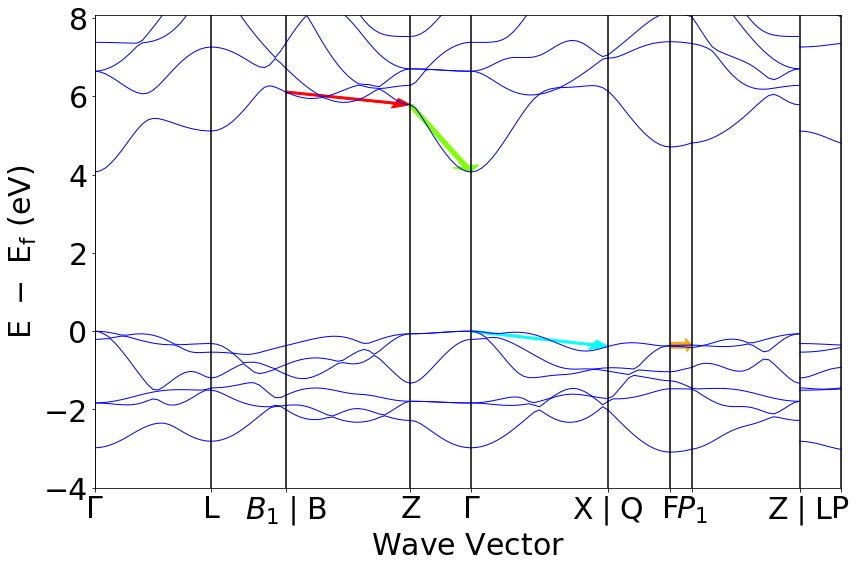

In [136]:
fig.get_plot()
plt.arrow(xi_min_pc, yi_min_pc, dx_min_pc, dy_min_pc, color='r', width = 0.05,head_width = 0.25,  head_length = 0.15, 
          length_includes_head= True)
plt.arrow(xi_max_pc, yi_max_pc, dx_max_pc, dy_max_pc, color='chartreuse', width = 0.05,head_width = 0.25,  head_length = 0.15, 
          length_includes_head= True)
plt.arrow(xi_min_pv, yi_min_pv, dx_min_pv, dy_min_pv, color='orange', width = 0.15,head_width = 0.35,  head_length = 0.05, 
          length_includes_head= True)
plt.arrow(xi_max_pv, yi_max_pv, dx_max_pv, dy_max_pv, color='cyan', width = 0.05,head_width = 0.25,  head_length = 0.15, 
          length_includes_head= True)

Sur ce graphe, la flèche rouge représente la dispersion minimale dans la première bande de conduction, sa direction est $B_1|B - Z$ et sa pente est de -0.28183. La flèche verte représente la dispersion maximale dans la première bande de conduction, sa direction est $Z - \Gamma$ et sa pente est de -3.04331. La flèche bleue représente la dispersion maximale dans la dernière bande de valence, sa sirection est $\Gamma - X|Q$ et sa pente est de -0.30756. Enfin, la flèche orange représente la dispersion minimale dans la dernière bande de valence, sa direction est $F - P_1$ et sa pente est de 0.04217.

# 3) Masses effectives

Cette section va aussi être séparée en deux parties. Premièrement, il va être nécessaire de trouver le sommet de la dernière bande de valence ainsi que la base de la première bande de conduction. Ensuite il faudra calculer la masse effective en ces deux points en approximant la dispersion par une parabole.

### A) Sommet de la dernière bande de valence et base de la première bande de conduction

Pour cela, on va simplement chercher la valeur de l'énergie maximale pour la dernière bande de valence ainsi que la valeur minimale de l'énergie pour la première bande de conduction, on va enregistrer les coordonnées de ces deux points afin d'y avoir accès facilement pour y claculer la masse. 

In [137]:
xv = [0,0]
max_ev = -3
xc = [0,0]
min_ec = 6
for i in range(len(di)):
    lv = en[i].get('1')[indice_val]
    lc = en[i].get('1')[indice_cond]
    mv = max(lv)
    mc = min(lc)
    if mv >= max_ev:
        max_ev = mv 
        xv = [i,lv.index(mv)]
        
    if mc <= min_ec: 
        min_ec = mc
        xc = [i,lc.index(mc)]
        
print(max_ev,xv)
print(min_ec,xc)

0.0 [4, 0]
4.0684000000000005 [4, 0]


On peut remarquer que le maximum et le minimum recherchés sont sur le même vecteur d'onde, $\Gamma$, cela était prévisible au vu des résultats du point 1, la bande interdite est directe.

### B) Calcul des masses effectives

On doit supposer que la dispersion est parabolique pour cela on peut interpoler plusieurs points proches du minimum et du maximum par une fonction du second degré. Grâce à cette approximatiion, on peut calculer la masse effective via cette formule : 

$$
m^{*} = \frac{\hbar}{\frac{d^2E}{dk^2}}
$$

avec $\hbar$ qui est égal à $1.0545718176461565 * 10^{-34} J / s$

Il s'agit donc bien de la fonction d'interpolation qui va être dérivée deux fois dans cette équation. 

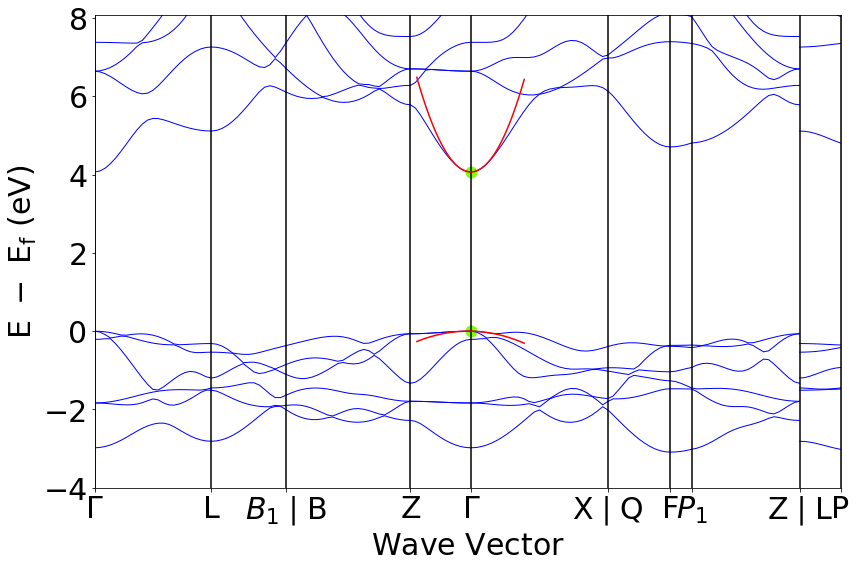

In [138]:
Ev = en[3].get('1')[indice_val][10:12]+en[4].get('1')[indice_val][:3]
Ec = en[3].get('1')[indice_cond][10:12]+en[4].get('1')[indice_cond][:3]
x = di[3][10:12] + di[4][:3]
iv = np.polyfit(x,Ev,2) #Interpolation pour le maximum de la bande de valence 
ic = np.polyfit(x,Ec,2) #Interpolation pour le minimum de la bande de conduction
fv = np.poly1d(iv)
fc = np.poly1d(ic)

fig.get_plot()
abscisses = np.linspace(3,4,100)
plt.plot(abscisses, fc(abscisses),color='r')
plt.plot(abscisses, fv(abscisses),color='r')
plt.scatter(di[4][0],en[4].get('1')[indice_val][0], c = "chartreuse", s = 120, marker = 'o')
plt.scatter(di[4][0],en[4].get('1')[indice_cond][0], c = "chartreuse", s = 120, marker = 'o')

On peut voir les deux paraboles, représentées en rouge, qui approximent bien la dispersion aux points extrêmums, représentés en vert. On va donc pouvoir calculer les deux masses effectives sur bases des interpolations.

In [139]:
from scipy import constants
h_bar = constants.hbar
h_bar2 = 6.582119570 * 1e-16 #eVs

eV = 1.602176634e-19
diff_c = np.diff(fc,2)
diff_v = np.diff(fv,2)
m_ec = (h_bar/eV)**2/diff_c[0]
m_ev = (h_bar/eV)**2/diff_v[0]
print(m_ec,m_ev)

1.6345797128113527e-33 -1.3987669703550376e-32


On peut donc conclure que la masse effective au sommet de la bande de valence est de -1.3987669703550376e-32 kg tandis que la masse effective à la base de la bande de conduction vaut 1.6345797128113527e-33 kg.